In [292]:
import datetime
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
# # https://www.cnblogs.com/-wenli/p/14020264.html
# # f = h5py.File('path/filename.h5','r') #打开h5文件
# f = h5py.File('Mnist_pFedMe_0.005_1.0_15_5u_20b_10_5_0.09_avg.h5','r')
# print(f.filename, ":")
# print([key for key in f.keys()], "\n")  

# #['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

# d = f['rs_glob_acc']

# # Print the data of 'dset'.
# print(d.name, ":")
# print(type(d[:]))
# print('-----------------------------------')
# print(len(d.attrs.keys()))
# # Print the attributes of dataset 'dset'.
# for key in d.attrs.keys():
#     print(key, ":", d.attrs[key])


In [293]:
# stat_files = ['Mnist_FedAvg_0.005_1.0_15_5u_20b_20_0_fixed.h5',
#              'Mnist_PerAvg_p_0.005_0.001_15_5u_20b_20_0_fixed.h5',
#              'Mnist_pFedMe_0.005_1.0_15_5u_20b_20_5_0.09_0_fixed.h5',
#              'Mnist_pFedMe_p_0.005_1.0_15_5u_20b_20_5_0.09_0.h5',
#              'Mnist_pFedMe_0.005_1.0_15_5u_20b_20_5_0.09_0.h5',
#              'Mnist_FedAvg_0.005_1.0_15_5u_20b_20_0.h5',
#              'Mnist_PerAvg_p_0.005_0.001_15_5u_20b_20_0.h5',
#              'Mnist_pFedMe_p_0.005_1.0_15_5u_20b_20_5_0.09_0_fixed.h5']
stat_files = [
    'Synthetic_FedAvg_0.005_1.0_15_10u_20b_0.7r_20_0.h5',
    'Synthetic_FedAvg_0.005_1.0_15_10u_20b_0.8r_20_0.h5',
    'Synthetic_FedAvg_0.005_1.0_15_10u_20b_0.9r_20_0.h5',
    'Synthetic_PerAvg_p_0.005_0.001_15_10u_20b_0.7r_20_0.h5',
    'Synthetic_PerAvg_p_0.005_0.001_15_10u_20b_0.8r_20_0.h5',
    'Synthetic_PerAvg_p_0.005_0.001_15_10u_20b_0.9r_20_0.h5',
    'Synthetic_pFedMe_0.005_1.0_20_10u_20b_0.7r_20_5_0.01_0.h5',
    'Synthetic_pFedMe_0.005_1.0_20_10u_20b_0.8r_20_5_0.01_0.h5',
    'Synthetic_pFedMe_0.005_1.0_20_10u_20b_0.9r_20_5_0.01_0.h5',
    'Synthetic_pFedMe_0.005_1.0_20_10u_20b_1.0r_20_5_0.01_0.h5',
    'Synthetic_pFedMe_p_0.005_1.0_20_10u_20b_0.7r_20_5_0.01_0.h5',
    'Synthetic_pFedMe_p_0.005_1.0_20_10u_20b_0.8r_20_5_0.01_0.h5',
    'Synthetic_pFedMe_p_0.005_1.0_20_10u_20b_0.9r_20_5_0.01_0.h5',
    'Synthetic_pFedMe_p_0.005_1.0_20_10u_20b_1.0r_20_5_0.01_0.h5',
    'Synthetic_PerAvg_p_0.005_0.001_15_10u_20b_1.0r_20_0.h5',
    'Synthetic_FedAvg_0.005_1.0_15_10u_20b_1.0r_20_0.h5'
]

In [298]:
def compare_algorithms_in_three_aspects(algorithm = 'pFedme'):
    # some basic components
    fig, subplot_arr = plt.subplots(1,3,figsize=(8,5))
    plt.subplot(131)
    plt.xlabel("Global rounds",{'size':14})
    plt.ylabel("Test Accuracy",{'size':14}) #y轴标签
    plt.title("pFedMe",{'size':15})
    plt.grid(linestyle=":", color="grey")
    plt.subplot(132)
    plt.xlabel("Global rounds",{'size':14})
#     plt.ylabel("Test Accuracy") #y轴标签 
    plt.title("PerAvg",{'size':15})
    plt.grid(linestyle=":", color="grey")
    plt.subplot(133)
    plt.xlabel("Global rounds",{'size':14})
#     plt.ylabel("Test Accuracy") #y轴标签 
    plt.grid(linestyle=":", color="grey")
    plt.title("FedAvg",{'size':15})
    for stat_file in stat_files:
        f = h5py.File(stat_file,'r')
        print(f.filename,":")
        print([key for key in f.keys()],"\n")
        n_pts = len(f['rs_glob_acc'][:])
        print("length of data points:", n_pts)
        #print([key for key in f.keys()],"\n")
        x = np.array([pt for pt in range(n_pts)])
        y = np.array(f['rs_glob_acc'][:])
        b = make_interp_spline(x, y)
        y = b(x)
#         f1 = np.polyfit(x, y, 9)
#         p1 = np.poly1d(f1)
#         print(p1)#打印出拟合函数
#         y = p1(x) 
        if 'FedAvg' in stat_file:
            plt.subplot(133)
            plt.ylim(0.4, 0.86)
            lb = 'g'
            for r in ['0.7r','0.8r','0.9r','1.0r']:
                if r in stat_file:
                    lb = lb + ' {}'.format(r[:-1])
            plt.tick_params(labelsize=12)
            #plt.title_params(labelsize=11)
            plt.plot(x,y,linewidth=1,label = lb)
            #plt.legend()
        elif 'PerAvg' in stat_file:
            plt.subplot(132)
            plt.ylim(0.4, 0.86)
            lb = 'g'
            for r in ['0.7r','0.8r','0.9r','1.0r']:
                if r in stat_file:
                    lb = lb + ' {}'.format(r[:-1])
            print('label:',lb)
            plt.tick_params(labelsize=12)
            plt.plot(x,y,linewidth=1,label =lb)
            #plt.legend()
        elif 'pFedMe' in stat_file:
            plt.subplot(131)
            plt.ylim(0.4, 0.86)
            lb = ''
#             if not '_p_' in stat_file and not 'fixed' in stat_file:
#                 lb = lb +' global'
            if '_p_' in stat_file:
                lb = lb +' p'
            else:
                lb = lb +' g'
            
            for r in ['0.7r','0.8r','0.9r','1.0r']:
                if r in stat_file:
                    lb = lb + ' {}'.format(r[:-1])
            
            plt.tick_params(labelsize=12)
            plt.plot(x,y,linewidth=1,label =lb[1:])
            plt.legend(loc=2, ncol=4, bbox_to_anchor=(0,-0.2),borderaxespad = 0.,fontsize='large') 
    plt.subplots_adjust(bottom=0.26)
    plt.savefig('myplot.jpg')
    plt.show()
        

Synthetic_FedAvg_0.005_1.0_15_10u_20b_0.7r_20_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 600
Synthetic_FedAvg_0.005_1.0_15_10u_20b_0.8r_20_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 600
Synthetic_FedAvg_0.005_1.0_15_10u_20b_0.9r_20_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 600
Synthetic_PerAvg_p_0.005_0.001_15_10u_20b_0.7r_20_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 600
label: g 0.7
Synthetic_PerAvg_p_0.005_0.001_15_10u_20b_0.8r_20_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 600
label: g 0.8
Synthetic_PerAvg_p_0.005_0.001_15_10u_20b_0.9r_20_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 600
label: g 0.9
Synthetic_pFedMe_0.005_1.0_20_10u_20b_0.7r_20_5_0.01_0.h5 :
['rs_glob_acc', 'rs_train_acc', 'rs_train_loss'] 

length of data points: 600
Synthetic_pFedMe_0.005_1.

/home/pei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/pei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/pei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier inst

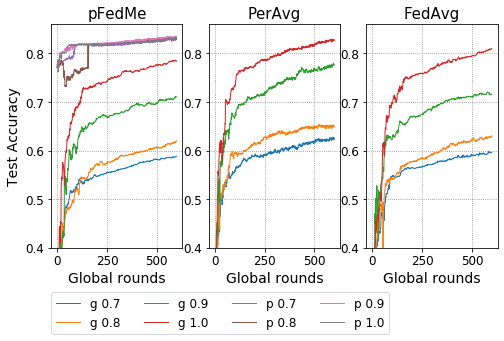

In [299]:
compare_algorithms_in_three_aspects()